# Clustering things

Ok so there are three packages here to cluster differently. I can make edits to the plotting but i want to just prototype quickly. 
1) Affinity prop via sci-kit leanr 
2) cdlib 
3) leiden 


What i would do to study these from the ground up on a new network is the following: 
1) run a few algos (especially affinity prop). 
2) It seems that affinity prop is biased toward over community inclusion at a given temperature so a good method im finding is just using lower temperatures to find communities at your temperatuve of interest. I will say, affinity prop at the right temp is still pretty good. 
3) sweep the resolution parameter for rb_pots. This is a good way to grow out your basins and give you a few options at a single temperature. 

In [12]:
from kmcluster.core.utils import fetch_huanchen_plot
from kmcluster.core.data import sparse_to_mat
from kmcluster.core.data import energy_to_rates
from kmcluster.core.intialize import random_init, boltz
from kmcluster.core.viz import graph_trajectories_static
from kmcluster.core.cluster import (
    plot_coms_cdlib,
    plot_affinity_at_temp,
)

# supress warnings
import warnings

warnings.filterwarnings("ignore")

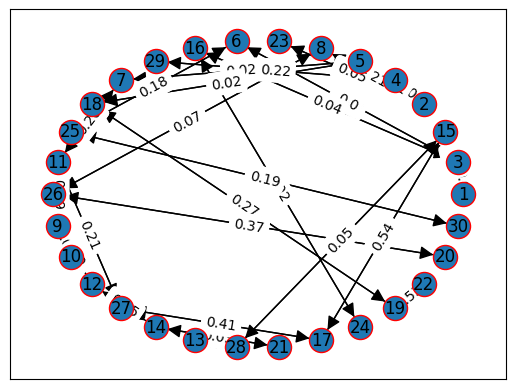

In [2]:
# Pt7_all, Pt7_rel = Pt7_bars = fetch_pt7_data()
# energies_mat = sparse_to_mat(Pt7_all)

huan_all, huan_rel = huan_bars = fetch_huanchen_plot()
energies_huan_mat = sparse_to_mat(huan_all)
G = graph_trajectories_static(energies_huan_mat)

In [3]:
temp_boltz = 700 * 8.617 * 10 ** (-5)
init_boltz = boltz(energies=huan_rel, T=temp_boltz, size=10000)
init_random = random_init(10000, energies_huan_mat.shape[0])


# this is needed for some graph methods to update the edge weights(affinities)
def add_rates_as_weights_to_graph(G, energies_mat, temp):
    rate_mat = energy_to_rates(energies_mat, temp, scale=1)
    for i, j in G.edges():
        G.edges[i, j]["weight"] = rate_mat[i - 1, j - 1]
    return G

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

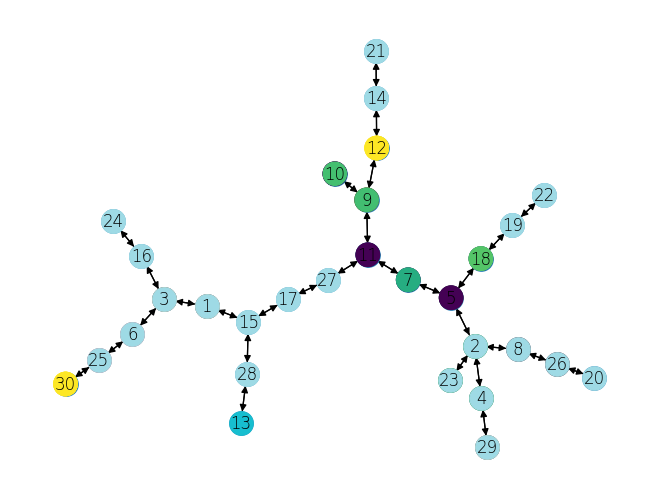

In [4]:
plot_affinity_at_temp(
    G,
    energies_huan_mat,
    huan_rel,
    weightage=init_boltz.get_init_populations(),
    temperature=700,  # don't use boltz_temp!!!
)

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib.algorithms import (
    aslpaw,
    infomap,
    rb_pots,
)

# you have to call this every time you want to change temps!
G = add_rates_as_weights_to_graph(G, energies_huan_mat, 700)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

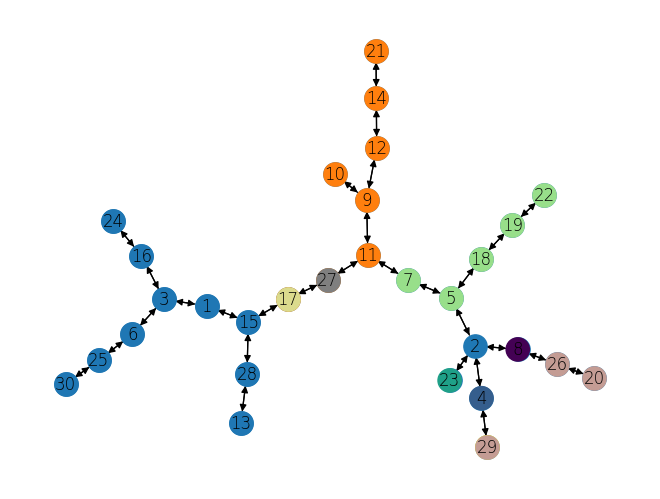

In [6]:
# aslpaw
coms = aslpaw(G)
plot_coms_cdlib(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


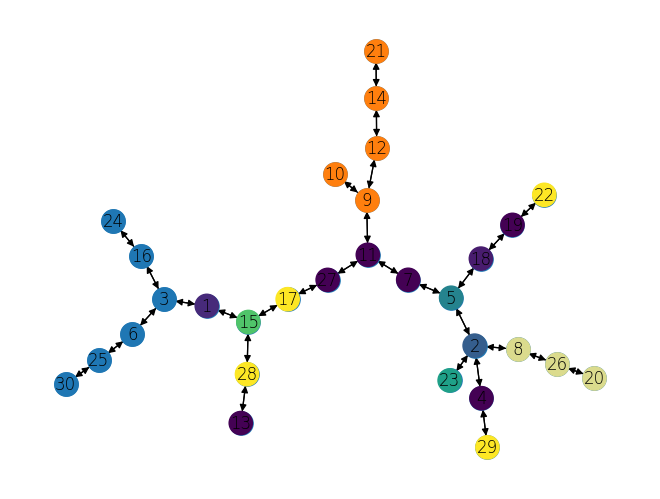

In [7]:
# infomap
coms = infomap(G)
plot_coms_cdlib(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

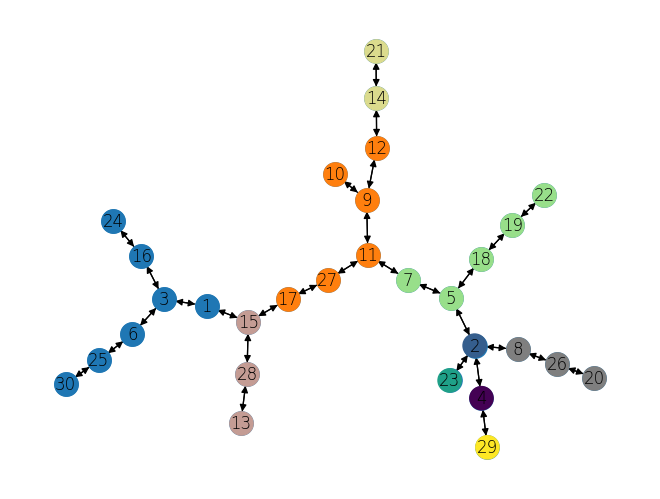

In [8]:
# rb_pots
# resolution parameter - nice parameter to play with for size of communities
# higher value -> smaller communities
coms = rb_pots(G, weights="weight", resolution_parameter=1.0)
plot_coms_cdlib(G, coms.communities)

In [9]:
import leidenalg as la

# convert networkx graph to igraph
import igraph as ig

ig_G = ig.Graph.from_networkx(G)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

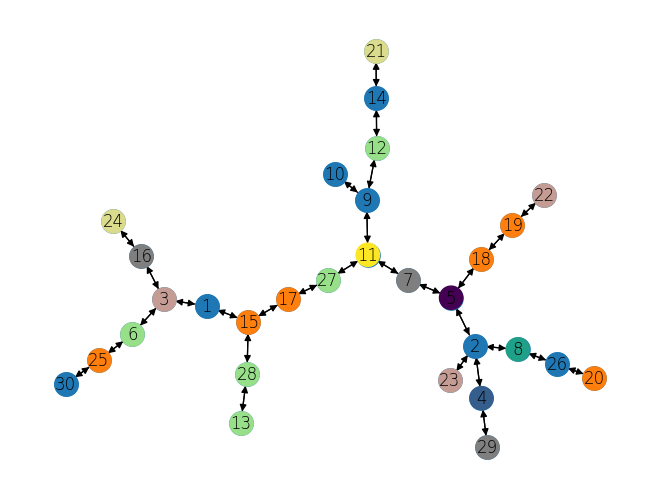

In [10]:
partition = la.find_partition(
    ig_G, la.ModularityVertexPartition, weights="weight", n_iterations=-1
)
membership_list_ld = partition.membership
cdlib_coms_ld = [[] for i in range(len(set(membership_list_ld)))]
for i, j in enumerate(membership_list_ld):
    cdlib_coms_ld[j].append(i + 1)
plot_coms_cdlib(G, cdlib_coms_ld)